### Recuperando los datos de <i>Ice Cream Avenue </i>

In [82]:
# Importación de librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Carga los datos de <i>Ice Cream Avenue</i> que trataste en el lab anterior. Una vez cargados, asegúrate de que aparecen todas las semanas en el DataFrame anterior (no te preocupes si aparecen NAs)

In [83]:
# Lee el archivo CSV
df_helados = pd.read_csv('./dataset_helados.csv')
df_helados['fecha'] = pd.to_datetime(df_helados['fecha'])


# Muestra las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df_helados.head())

Primeras filas del DataFrame:
       fecha  ventas_unidades    precio  navidad
0 2019-01-07             3694  2.903333        0
1 2019-01-14             3052  2.846667        0
2 2019-01-21             2952  2.820000        0
3 2019-01-28             3165  2.890000        0
4 2019-02-04             3211  2.925000        0


### Trabajando con temperaturas

Carga los datos de temperatura y transfórmalos para que tengan periodicidad semanal (comenzando en lunes)

In [84]:

# Cargar los datos de temperatura desde un archivo CSV
df_temperatura = pd.read_csv('./temperatura_media_diaria-1.csv')

# Convertir la columna 'fecha' a tipo datetime
df_temperatura['fecha'] = pd.to_datetime(df_temperatura['fecha'])

# Agregar una columna para la semana empezando en lunes
df_temperatura['fecha'] = df_temperatura['fecha'] - pd.to_timedelta(df_temperatura['fecha'].dt.dayofweek, unit='D')

# Agrupar por semana y calcular la media de la temperatura
df_temperatura_semanal = df_temperatura.groupby('fecha').agg({'temp_media': 'mean'}).reset_index()

# Mostrar el DataFrame resultante
print(df_temperatura_semanal)


         fecha  temp_media
0   2017-05-01   18.338164
1   2017-05-08   16.448682
2   2017-05-15   11.415356
3   2017-05-22   14.241034
4   2017-05-29   15.164833
..         ...         ...
200 2021-03-01   11.012048
201 2021-03-08   13.906200
202 2021-03-15   12.623027
203 2021-03-22    9.450598
204 2021-03-29   13.952965

[205 rows x 2 columns]


### Creando el tablón

Combina todos los dataframes en uno solo, partiendo del dataset con los datos de helados agregados por semana. Utiliza left joins.

In [85]:
# Realizar left join con df_helados y df_temperatura_semanal
df_combinado = df_temperatura_semanal.merge(df_helados, on='fecha', how='left')

# Mostrar el DataFrame resultante
print(df_combinado)

         fecha  temp_media  ventas_unidades  precio  navidad
0   2017-05-01   18.338164              NaN     NaN      NaN
1   2017-05-08   16.448682              NaN     NaN      NaN
2   2017-05-15   11.415356              NaN     NaN      NaN
3   2017-05-22   14.241034              NaN     NaN      NaN
4   2017-05-29   15.164833              NaN     NaN      NaN
..         ...         ...              ...     ...      ...
200 2021-03-01   11.012048              NaN     NaN      NaN
201 2021-03-08   13.906200              NaN     NaN      NaN
202 2021-03-15   12.623027              NaN     NaN      NaN
203 2021-03-22    9.450598              NaN     NaN      NaN
204 2021-03-29   13.952965              NaN     NaN      NaN

[205 rows x 5 columns]


### Missing values

Explora los missing values o valores perdidos. ¿En qué variables aparecen?

In [86]:
# Calcular el número de valores faltantes en cada columna
missing_values = df_combinado.isnull().sum()

# Mostrar las columnas con valores faltantes y la cantidad de valores faltantes en cada una
print("Valores faltantes por columna: \n")
print(missing_values)

Valores faltantes por columna: 

fecha                0
temp_media           0
ventas_unidades    102
precio             102
navidad            102
dtype: int64


**Observamos como los valores perdidos son aquellos, donde no teniamos datos recogidos sobre ventas_unidades, precio o navidad. Esto se debe a que en el dataset de df_temperatura_semanal tenemos fechas mas antiguas con datos recogidos que en el dataset df_helados.** 

Trata los missing values, rellenándolos con el método que creas más adecuado

In [87]:
# Imputar valores faltantes con la media de cada columna
df_completo_filled = df_combinado.fillna(df_combinado.mean())
print(df_completo_filled)


         fecha  temp_media  ventas_unidades    precio   navidad
0   2017-05-01   18.338164      5219.524272  2.909665  0.038835
1   2017-05-08   16.448682      5219.524272  2.909665  0.038835
2   2017-05-15   11.415356      5219.524272  2.909665  0.038835
3   2017-05-22   14.241034      5219.524272  2.909665  0.038835
4   2017-05-29   15.164833      5219.524272  2.909665  0.038835
..         ...         ...              ...       ...       ...
200 2021-03-01   11.012048      5219.524272  2.909665  0.038835
201 2021-03-08   13.906200      5219.524272  2.909665  0.038835
202 2021-03-15   12.623027      5219.524272  2.909665  0.038835
203 2021-03-22    9.450598      5219.524272  2.909665  0.038835
204 2021-03-29   13.952965      5219.524272  2.909665  0.038835

[205 rows x 5 columns]


### Representación gráfica

Representa graficamente la serie de unidades vendidas

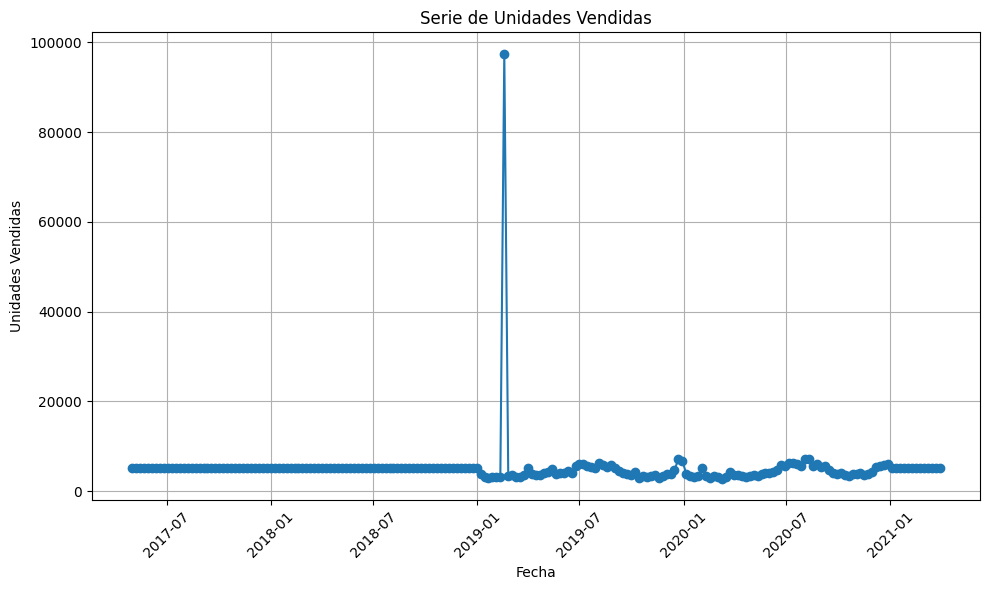

In [88]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de la serie de unidades vendidas
plt.plot(df_completo_filled['fecha'], df_completo_filled['ventas_unidades'], marker='o', linestyle='-')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.title('Serie de Unidades Vendidas')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


Representa graficamente las ventas medias en euros del periodo de navidad frente al resto del año. Utiliza un gráfico de barras 

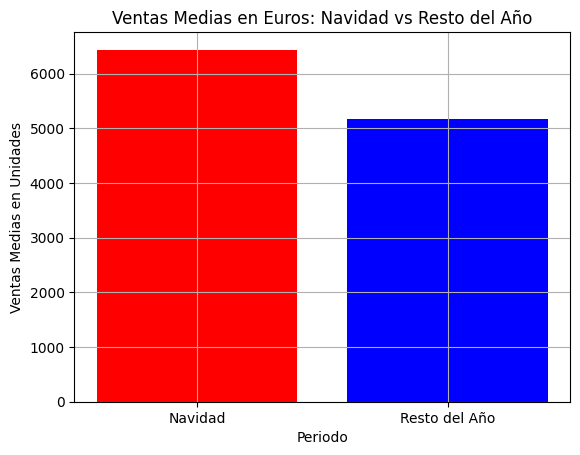

In [89]:
# Calcular la media de las ventas en euros durante el periodo de Navidad y el resto del año
ventas_navidad = df_completo_filled[df_completo_filled['navidad'] == 1]['ventas_unidades'].mean()
ventas_resto_ano = df_completo_filled[df_completo_filled['navidad'] == 0]['ventas_unidades'].mean()

# Crear listas de valores y etiquetas para el gráfico de barras
ventas = [ventas_navidad, ventas_resto_ano]
periodos = ['Navidad', 'Resto del Año']

# Crear el gráfico de barras
plt.bar(periodos, ventas, color=['red', 'blue'])

# Agregar etiquetas y título
plt.xlabel('Periodo')
plt.ylabel('Ventas Medias en Unidades')
plt.title('Ventas Medias en Euros: Navidad vs Resto del Año')

# Mostrar la gráfica
plt.grid(True)
plt.show()

### Detectando outliers

¿Hay algún outlier en las ventas de helados de tarrina? Señálalos, y argumenta si es un problema de datos, o se puede tratar de un valor real de la serie.

In [90]:
# Calcular el rango intercuartil (IQR)
Q1 = df_combinado['ventas_unidades'].quantile(0.25)
Q3 = df_combinado['ventas_unidades'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_combinado[(df_combinado['ventas_unidades'] < limite_inferior) | (df_combinado['ventas_unidades'] > limite_superior)]

# Mostrar outliers
print("Outliers en las ventas de helados de tarrina:")
print(outliers)

Outliers en las ventas de helados de tarrina:
        fecha  temp_media  ventas_unidades    precio  navidad
94 2019-02-18    8.205198          97487.0  2.986667      0.0


Corrige los outliers que creas necesario, utilizando los métodos que creas más adecuados

In [91]:
# Calcular la mediana de las ventas de helados de tarrina
mediana_ventas = df_combinado['ventas_unidades'].median()

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Reemplazar outliers por la mediana
df_combinado_corregido = df_combinado.copy()
df_combinado_corregido.loc[df_combinado['ventas_unidades'] < limite_inferior, 'ventas_unidades'] = mediana_ventas
df_combinado_corregido.loc[df_combinado['ventas_unidades'] > limite_superior, 'ventas_unidades'] = mediana_ventas

# Verificar si los outliers han sido corregidos
print("Valores corregidos:")
print(df_combinado_corregido.loc[outliers.index])


Valores corregidos:
        fecha  temp_media  ventas_unidades    precio  navidad
94 2019-02-18    8.205198           3924.0  2.986667      0.0


### Analizando las relaciones entre las variables

Calcula las correlaciones entre las variables del dataset, y analiza los resultados obtenidos.

In [92]:
# Calcular las correlaciones
correlaciones = df_combinado.corr()

# Mostrar las correlaciones
print("Correlaciones entre las variables del dataset:")
print(correlaciones)


Correlaciones entre las variables del dataset:
                    fecha  temp_media  ventas_unidades    precio   navidad
fecha            1.000000   -0.137790        -0.117455 -0.335911  0.166893
temp_media      -0.137790    1.000000        -0.053366 -0.352246 -0.218117
ventas_unidades -0.117455   -0.053366         1.000000  0.005230  0.026591
precio          -0.335911   -0.352246         0.005230  1.000000 -0.195118
navidad          0.166893   -0.218117         0.026591 -0.195118  1.000000


Las correlaciones entre las variables del dataset muestran que la temperatura media y el precio tienen una relación negativa moderada, lo que sugiere que a medida que la temperatura aumenta, el precio de los helados tiende a disminuir. Sin embargo, las ventas de unidades tienen una correlación muy baja con la temperatura y el precio, indicando que otros factores pueden influir más en las ventas. La fecha y la variable de Navidad muestran correlaciones débiles con las otras variables, lo que sugiere que su impacto en las ventas y el precio puede ser limitado. En resumen, aunque hay algunas relaciones identificables entre las variables, se necesitaría un análisis más detallado para comprender completamente los factores que afectan las ventas de helados.

### Prediciendo las ventas

Entrena un modelo de regresion lineal para explicar las ventas semanales de unidades a partir del resto de variables 

In [93]:
df_combinado.dropna(subset=['ventas_unidades'], inplace=True)

# Dividir los datos en variables predictoras (X) y variable de respuesta (y)
X = df_combinado[['temp_media', 'precio', 'navidad']]
y = df_combinado['ventas_unidades']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

# Coeficientes del modelo
print("Coeficientes del modelo:", model.coef_)


Error cuadrático medio: 4948246.75339368
Coeficientes del modelo: [ -176.21117025 -1605.45030123  -169.05111579]


Las ventas semanales de unidades se explican mediante una regresión lineal. La temperatura media, con coeficiente -176.21, y el precio, con -1605.45, presentan una relación negativa con las ventas, indicando que su aumento se asocia con una disminución en las unidades vendidas. La variable de Navidad, con coeficiente -169.05, también influye negativamente en las ventas. Estos hallazgos sugieren que factores como el clima, los precios y los períodos festivos afectan significativamente las ventas de unidades semanalmente.

Representa gráficamente la predicción de la regresión y el dato real

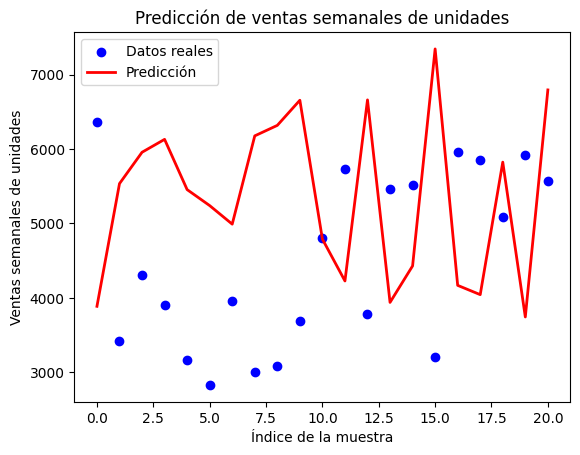

In [94]:
# Graficar los datos reales
plt.scatter(range(len(y_test)), y_test, color='blue', label='Datos reales')

# Graficar la predicción del modelo
plt.plot(range(len(y_test)), y_pred, color='red', linewidth=2, label='Predicción')

# Agregar etiquetas y leyenda
plt.xlabel('Índice de la muestra')
plt.ylabel('Ventas semanales de unidades')
plt.title('Predicción de ventas semanales de unidades')
plt.legend()

# Mostrar la gráfica
plt.show()